In [2]:
#import all librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/wecode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wecode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/wecode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
train_data = pd.read_csv("IMDB Dataset.csv")
train_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
train_data.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

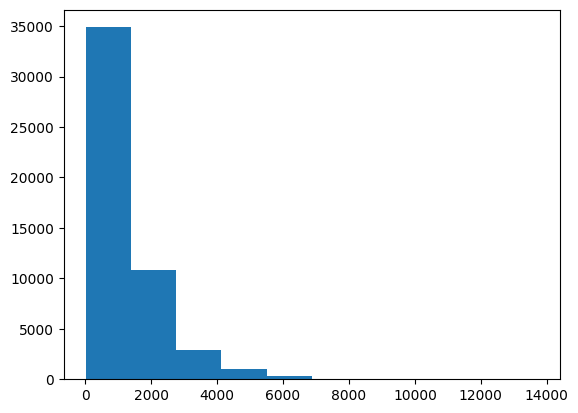

In [6]:
train_data['review_length'] = train_data['review'].apply(len)
plt.hist(train_data['review_length'])
plt.show()

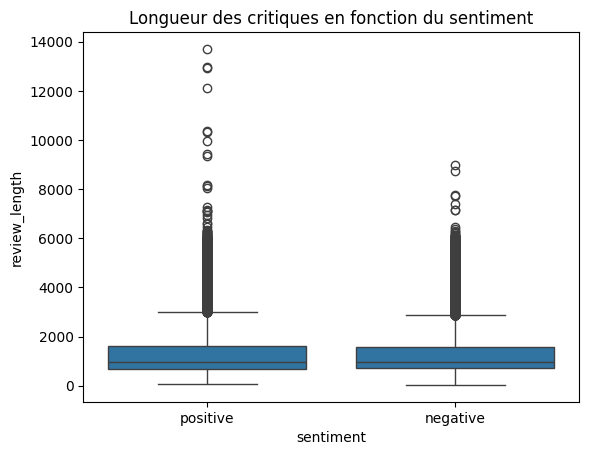

In [7]:
sns.boxplot(x='sentiment', y='review_length', data=train_data)
plt.title('Longueur des critiques en fonction du sentiment')
plt.show()

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
  text = re.sub(re.compile('<.*?>'), '', text)
  text = text.translate(str.maketrans('', '', string.punctuation)).lower()

  tokens = nltk.word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  return tokens

[nltk_data] Downloading package punkt to /home/wecode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wecode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wecode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Appliquer à review
train_data['processed_review'] = train_data['review'].apply(preprocess_text)
print(train_data[['review', 'processed_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review  
0  [one, reviewer, mentioned, watching, oz, episo...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, there, family, little, boy, jake, ...  
4  [petter, matteis, love, time, money, visually,...  


#**EDA**

In [10]:
from collections import Counter

#TOKEN une liste
all_tokens = [token for sublist in train_data['processed_review'] for token in sublist]

#fréquence
token_counts = Counter(all_tokens)
print(token_counts.most_common(20))

[('movie', 98938), ('film', 89751), ('one', 52648), ('like', 39780), ('time', 29354), ('good', 28596), ('character', 27565), ('get', 24431), ('even', 24281), ('story', 24212), ('would', 24001), ('make', 23563), ('see', 23489), ('really', 22894), ('scene', 20696), ('much', 18895), ('well', 18614), ('people', 17972), ('great', 17799), ('bad', 17645)]


In [11]:
!pip install wordcloud

!pip install --upgrade pip 

!pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


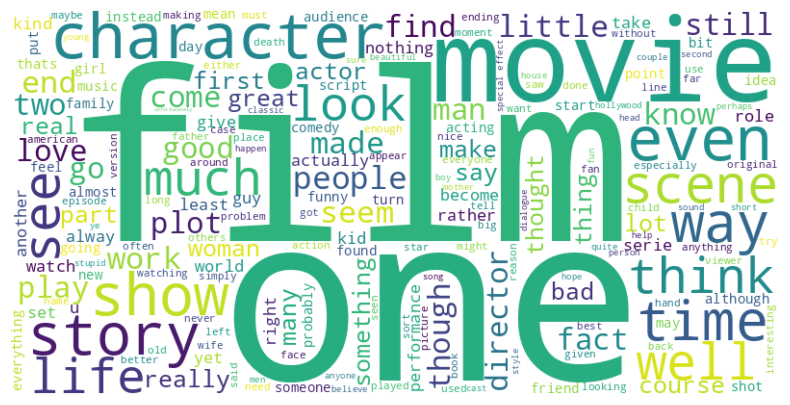

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# token en un caractères
all_text = ' '.join(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

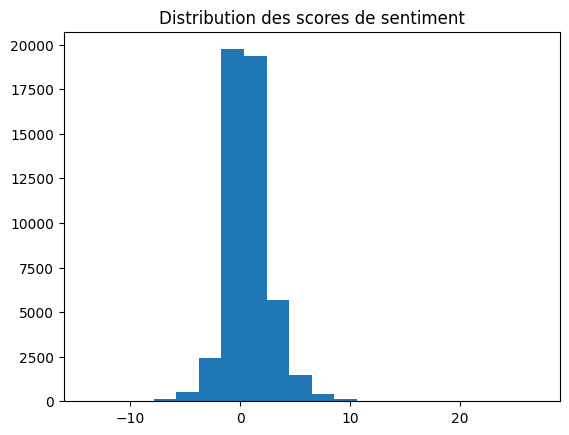

In [13]:
#liste sentiment
positive_words = ['good', 'great', 'excellent', 'amazing', 'fantastic', 'best', 'interresting', 'fan']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'disappointing']

# score
train_data['sentiment_score'] = train_data['processed_review'].apply(lambda tokens: sum([1 for token in tokens if token in positive_words]) - sum([1 for token in tokens if token in negative_words]))

# distribution
plt.hist(train_data['sentiment_score'], bins=20)
plt.title('Distribution des scores de sentiment')
plt.show()

In [14]:
# sentiment_score>0
positif = train_data[train_data['sentiment_score']>0]
positif.sentiment.value_counts()

sentiment
positive    17481
negative     9690
Name: count, dtype: int64

In [15]:
train_data

,review,sentiment,review_length,processed_review,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,1761,"[one, reviewer, mentioned, watching, oz, episo...",0
1,A wonderful little production. <br /><br />The...,positive,998,"[wonderful, little, production, filming, techn...",1
2,I thought this was a wonderful way to spend ti...,positive,926,"[thought, wonderful, way, spend, time, hot, su...",1
3,Basically there's a family where a little boy ...,negative,748,"[basically, there, family, little, boy, jake, ...",0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[petter, matteis, love, time, money, visually,...",3
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,"[thought, movie, right, good, job, wasnt, crea...",2
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,"[bad, plot, bad, dialogue, bad, acting, idioti...",-4
49997,I am a Catholic taught in parochial elementary...,negative,1280,"[catholic, taught, parochial, elementary, scho...",0
49998,I'm going to have to disagree with the previou...,negative,1234,"[im, going, disagree, previous, comment, side,...",0


#**BERT MODEL**

In [16]:
# #packages
# !pip install transformers datasets evaluate

# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from datasets import load_dataset
# from evaluate import load
# from evaluate import load_metric
# from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
# import torch
# from transformers import TrainingArguments, Trainer

In [17]:
# model_name = "bert-base-uncased"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [18]:
# def preprocess_function(examples):
#     return tokenizer(examples['review'], padding="max_length", truncation=True)

# bert_data = load_dataset('csv', data_files={'train': 'IMDB Dataset.csv'})
# encoded_dataset = bert_data.map(preprocess_function, batched=True)

In [19]:
# train_dataset, test_dataset = encoded_dataset['train'].train_test_split(test_size=0.2).values()

In [20]:
# training_args = TrainingArguments(
#     output_dir="./results",
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=64,
#     num_train_epochs=3,
#     learning_rate=2e-5,
#     weight_decay=0.01,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     load_best_model_at_end=True,
# )

In [21]:
# !pip install wandb

In [22]:
# eval_results = trainer.evaluate()
# print(f"Précision: {eval_results['eval_accuracy']}")

In [23]:
# #test prédiction
# new_tweet = "This is a great movie!"
# inputs = tokenizer(new_tweet, return_tensors="pt")
# outputs = model(**inputs)
# predicted_class = torch.argmax(outputs.logits).item()

# if predicted_class == 1:
#     print("Sentiment: Positif")
# else:
#     print("Sentiment: Négatif")

#**SIMPLE MODEL**

##REGRESSION LOGISTIQUE

Précision de la régression logistique : 0.8938
Rapport de classification pour la régression logistique :
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



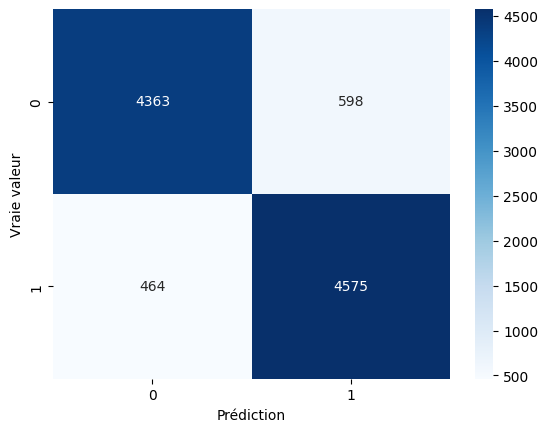

In [24]:
# Vectorisation
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(train_data['processed_review'].apply(lambda x: ' '.join(x)))

train_data['sentiment_num'] = train_data['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, train_data['sentiment_num'], test_size=0.2, random_state=42)


#Entraînement
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

#évaluation
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Précision de la régression logistique : {accuracy_lr}")
print(f"Rapport de classification pour la régression logistique :\n{report_lr}")

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

## SVM

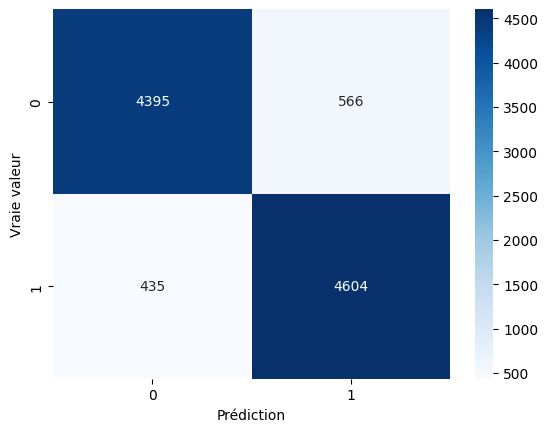

Précision de la SVM : 0.8999
Rapport de classification pour la SVM :
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [25]:
from sklearn.svm import SVC

# Entraînement
model_svm = SVC()
model_svm.fit(X_train, y_train)

#évaluation
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

print(f"Précision de la SVM : {accuracy_svm}")
print(f"Rapport de classification pour la SVM :\n{report_svm}")

## RANDON FOREST

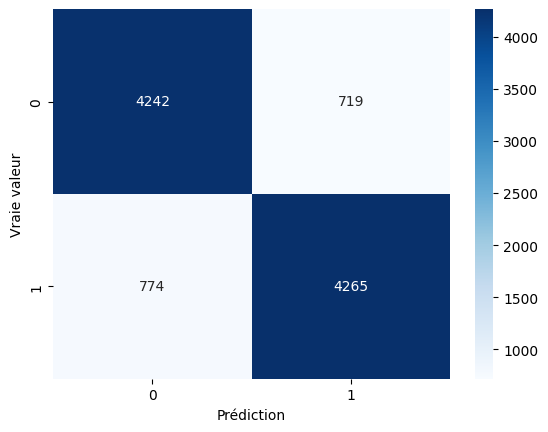

Précision de la forêt aléatoire : 0.8507
Rapport de classification pour la forêt aléatoire :
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [26]:
from sklearn.ensemble import RandomForestClassifier

#Entraînement
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

#évaluation
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

print(f"Précision de la forêt aléatoire : {accuracy_rf}")
print(f"Rapport de classification pour la forêt aléatoire :\n{report_rf}")

#**OTHERS MODELS**

##**Regression logistique**

In [ ]:
#recherche du meilleur paramètre
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Meilleurs paramètres pour LogisticRegression :", grid_search_lr.best_params_)


# Évaluatiion
y_pred_lr = grid_search_lr.predict(X_test)
#classification report
print(classification_report(y_test, y_pred_lr))

#cm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# accuracy_lr = accuracy_score(y_test, y_pred_lr)
# print(f"Précision LogisticRegression : {accuracy_lr}")
# print(classification_report(y_test, y_pred_lr))

/home/wecode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wecode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wecode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wecode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wecode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Meilleurs paramètres pour LogisticRegression : {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



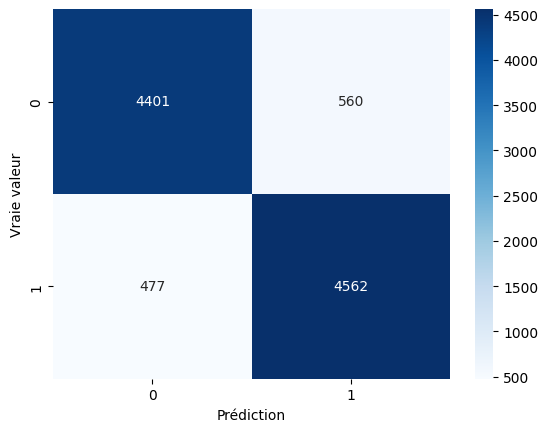

In [28]:
# Évaluatiion
y_pred_lr = grid_search_lr.predict(X_test)
#classification report
print(classification_report(y_test, y_pred_lr))

#cm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# accuracy_lr = accuracy_score(y_test, y_pred_lr)
# print(f"Précision LogisticRegression : {accuracy_lr}")
# print(classification_report(y_test, y_pred_lr))

In [ ]:
from joblib import dump

# 
dump(grid_search_lr, 'model_lr.joblib')
print("Modèle sauvegardé au format joblib")


Modèle sauvegardé au format joblib.✅


In [33]:
dump(vectorizer, 'vectorizer.joblib')


['vectorizer.joblib']

##**SVM**

In [29]:

# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
# grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
# grid_search_svm.fit(X_train, y_train)
# print("Meilleurs paramètres pour SVM :", grid_search_svm.best_params_)



# # Évaluee
# y_pred_svm = grid_search_svm.predict(X_test)
# print(classification_report(y_test, y_pred_svm))

# #cm
# cm = confusion_matrix(y_test, y_pred_svm)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Prédiction')
# plt.ylabel('Vraie valeur')

# # accuracy_svm = accuracy_score(y_test, y_pred_svm)
# # print(f"Précision SVM : {accuracy_svm}")
# # print(classification_report(y_test, y_pred_svm))

##**Forêts aléatoires**

In [30]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Meilleurs paramètres pour RandomForestClassifier :", grid_search_rf.best_params_)

Meilleurs paramètres pour RandomForestClassifier : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4961
           1       0.86      0.87      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Text(50.722222222222214, 0.5, 'Vraie valeur')

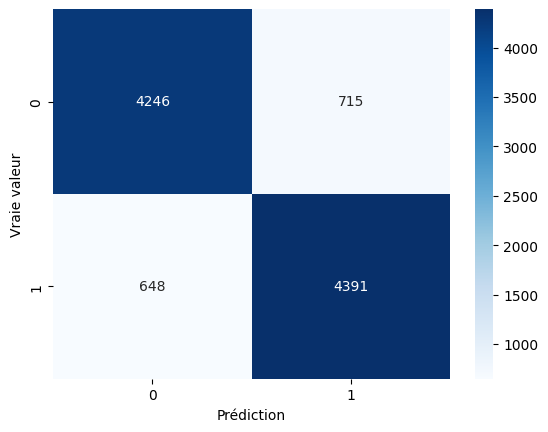

In [31]:
# Évaluer le modèle
y_pred_rf = grid_search_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

#cm
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')




# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f"Précision RandomForestClassifier : {accuracy_rf}")
# print(classification_report(y_test, y_pred_rf))